# Utilities

In [1]:
# Import a bunch
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from glob import glob
import shutil
import pathlib

In [2]:
# Install kaggle
! pip install -q kaggle
#Upload json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datnguyn","key":"a50c493876024bc081a79d4cbc9f9a15"}'}

In [3]:
#Download dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [01:50<00:00, 31.5MB/s]
100% 5.20G/5.20G [01:50<00:00, 50.5MB/s]


In [4]:
# Unzip data
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [5]:
# Move to data folder
!mkdir ../data
!mv /content/HAM10000_images_part_1 ../data
!mv /content/HAM10000_images_part_2 ../data

In [6]:
#Get all the image path
data_dir = '/data'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
len(all_image_path)

10015

In [7]:
! mkdir ../project
! mkdir ../project/data
! mkdir ../project/data/train
! mkdir ../project/data/test
! mkdir ../project/raw_data

# Walk-through the dataset

In [8]:
# Get dataframe from csv
df = pd.read_csv('/content/HAM10000_metadata.csv')
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [9]:
# Get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [10]:
# Fill in missing value
from statistics import median
df['age'] = df['age'].fillna(median(df['age']))

In [11]:
# Describe data
df.describe(include='all')

lesion_id      image_id     dx  ...           age    sex localization
count         10015         10015  10015  ...  10015.000000  10015        10015
unique         7470         10015      7  ...           NaN      3           15
top     HAM_0000835  ISIC_0025543     nv  ...           NaN   male         back
freq              6             1   6705  ...           NaN   5406         2192
mean            NaN           NaN    NaN  ...     51.824763    NaN          NaN
std             NaN           NaN    NaN  ...     16.928129    NaN          NaN
min             NaN           NaN    NaN  ...      0.000000    NaN          NaN
25%             NaN           NaN    NaN  ...     40.000000    NaN          NaN
50%             NaN           NaN    NaN  ...     50.000000    NaN          NaN
75%             NaN           NaN    NaN  ...     65.000000    NaN          NaN
max             NaN           NaN    NaN  ...     85.000000    NaN          NaN

[11 rows x 7 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

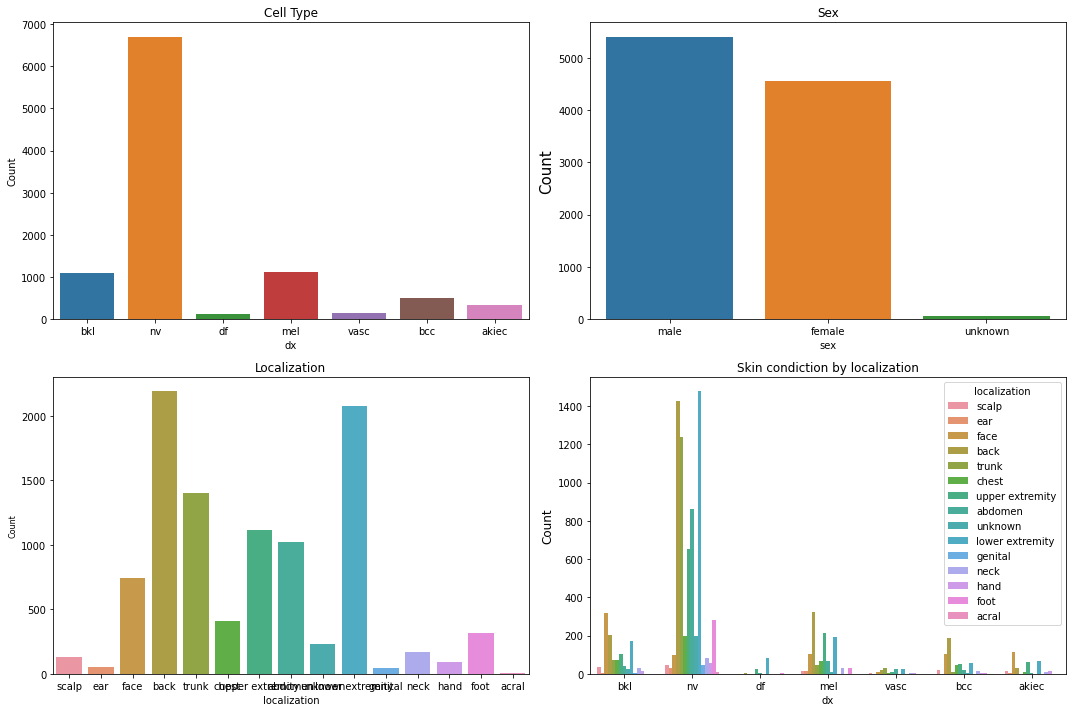

In [15]:
#EDA
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
sns.countplot(df['dx'])
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
sns.countplot(df['sex'])
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
sns.countplot(df['localization'])
ax3.set_ylabel('Count',size=8)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sns.countplot(df['dx'], hue=df['localization'])
ax4.set_ylabel('Count',size=12)
ax4.set_title('Skin condiction by localization')

plt.tight_layout()
plt.show()

In [16]:
# Get all the label
label = list(df['dx'].unique())
label

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [17]:
# Skin cancer condition dictionaries
cancer_type_dict = {
    'bkl': 'Benign keratosis-like lesions ',
    'nv': 'Melanocytic nevi',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'vasc': 'Vascular lesions',  
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses'
}

In [18]:
label_to_index = {
    'bkl': 0,
    'nv': 1,
    'df': 2,
    'mel': 3,
    'vasc': 4,  
    'bcc': 5,
    'akiec': 6
}

In [19]:
# Join 2 folder into a single folder
src1 = '/data/HAM10000_images_part_1'
src_files1 = os.listdir(src1)
destination = '/project/raw_data'
source1 = '/data/HAM10000_images_part_1'
for image in src_files1:
  shutil.copy((src1 + '/' + image),(destination + '/' + image))

src2 = '/data/HAM10000_images_part_2'
src_files2 = os.listdir(src2)
source2 = '/data/HAM10000_images_part_2'
for image in src_files2:
  shutil.copy((source2 + '/' + image), (destination + '/' + image))

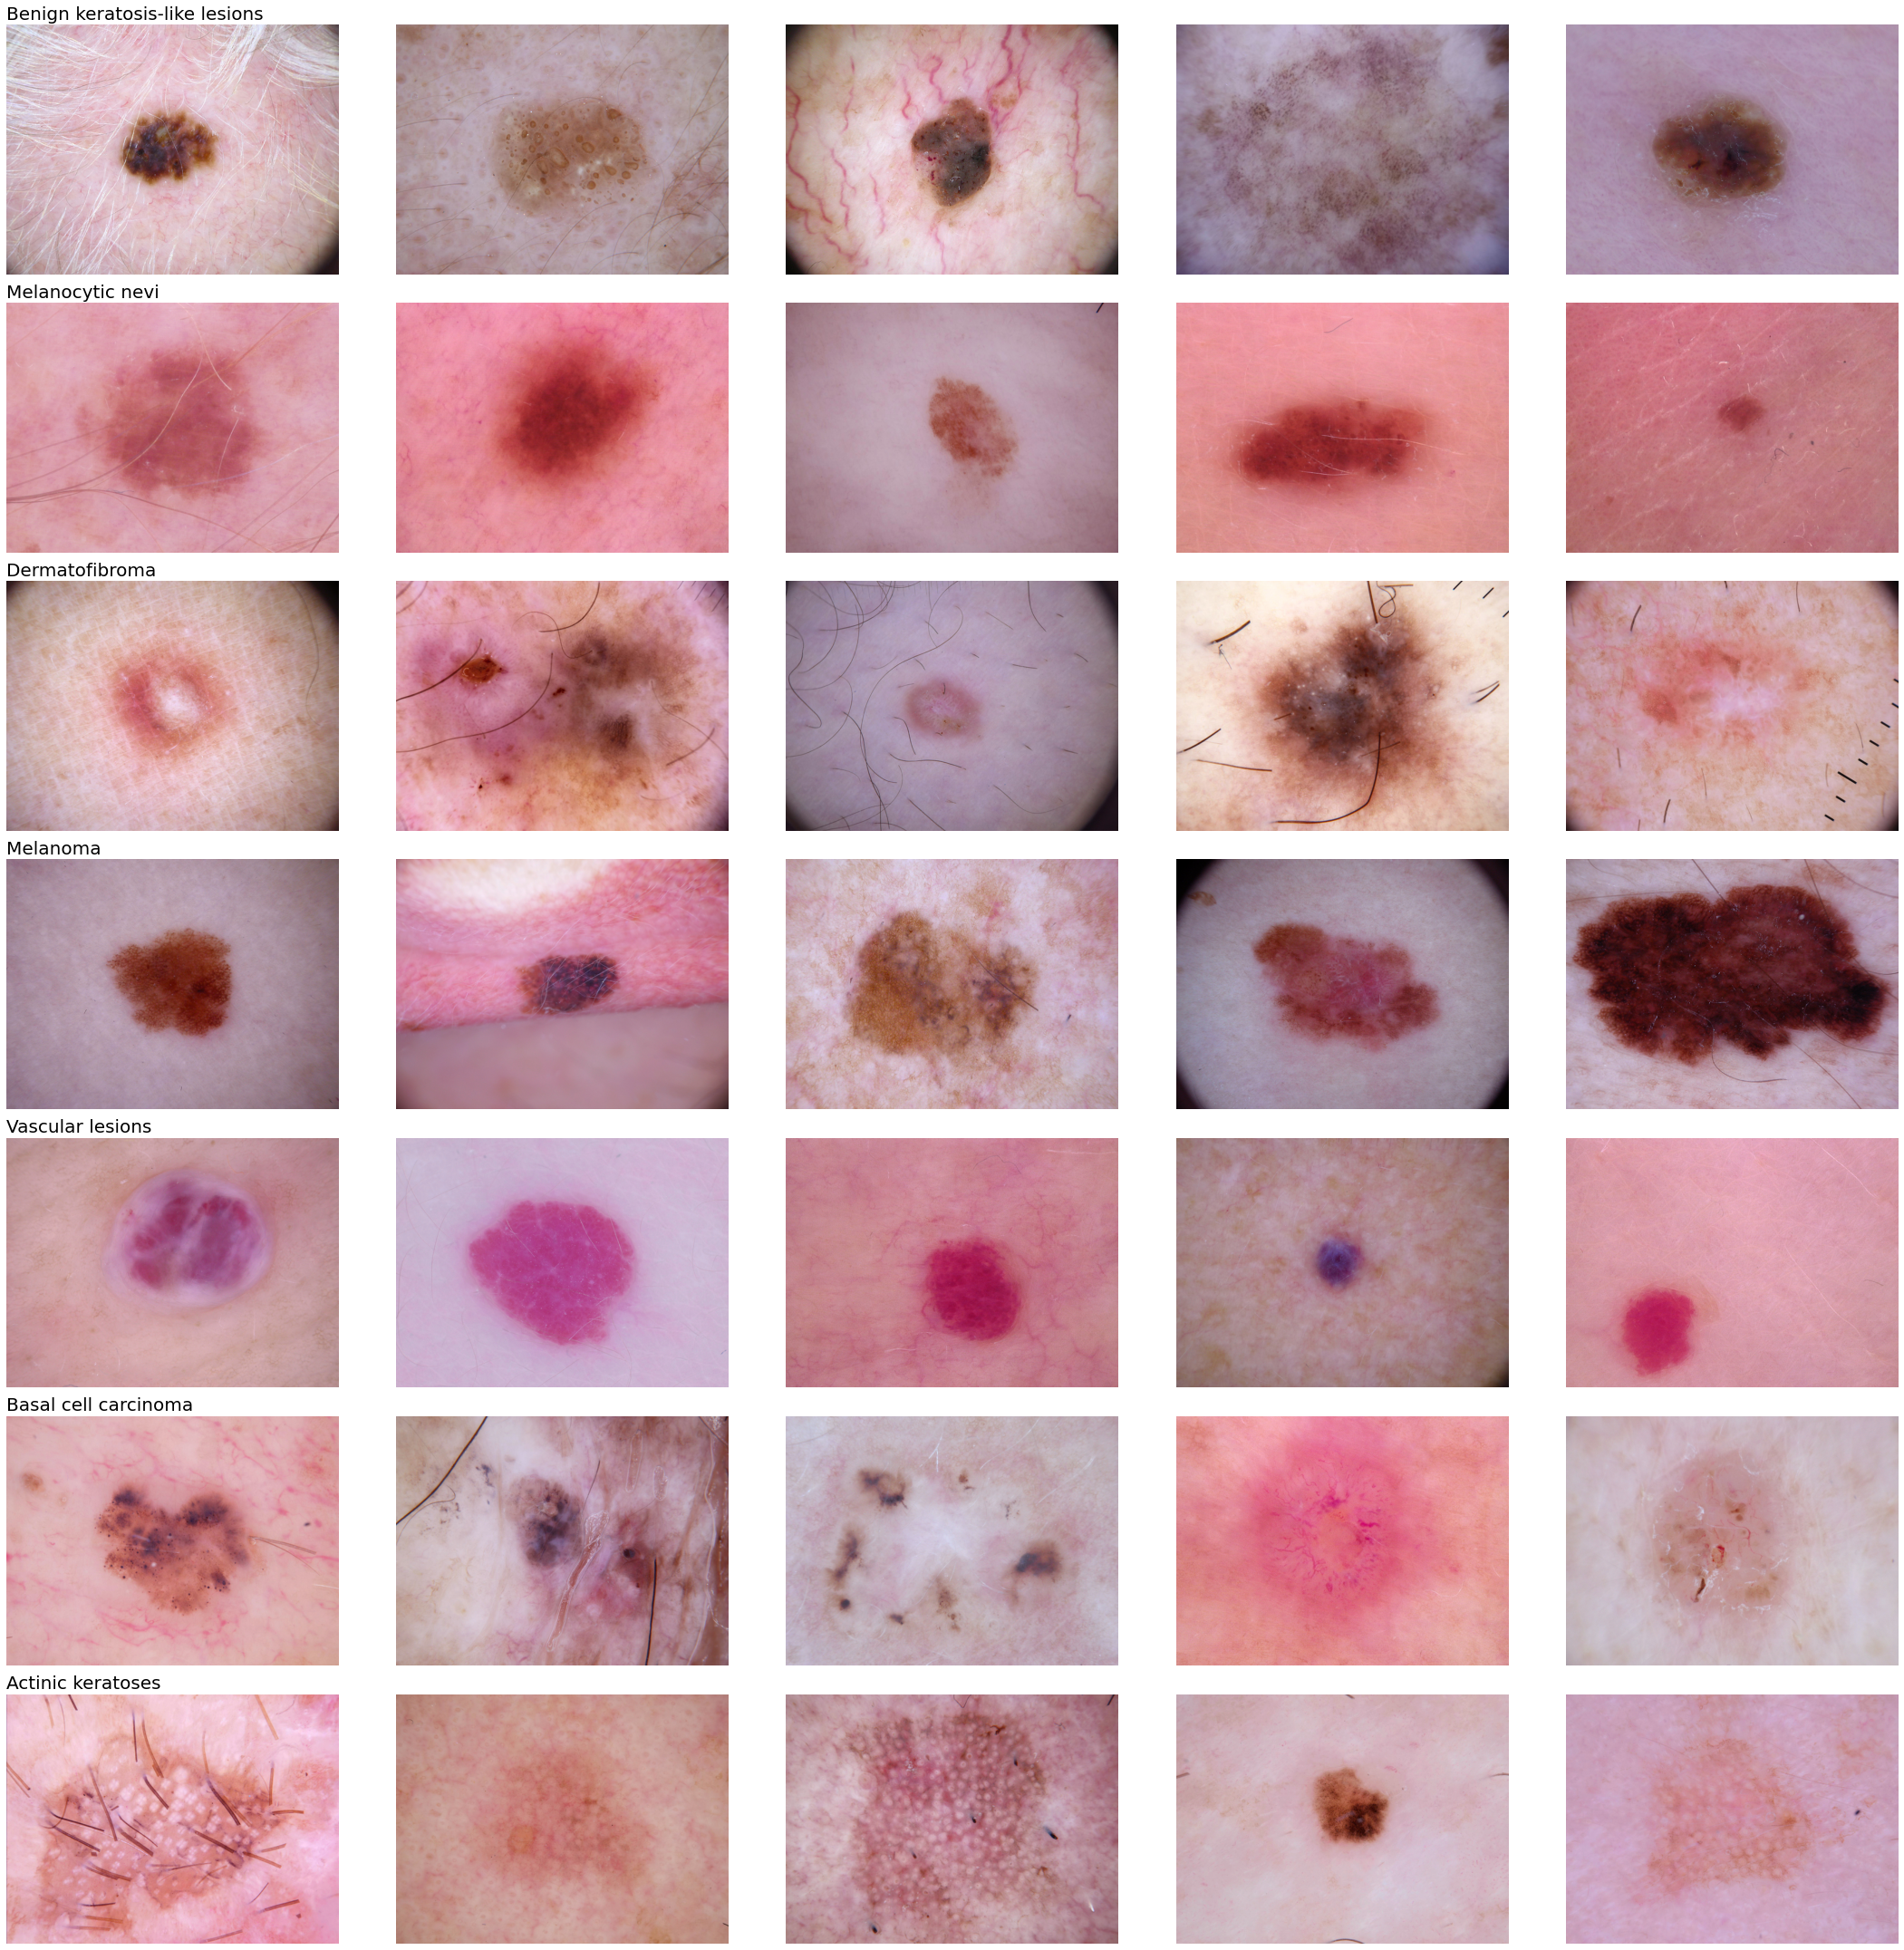

In [20]:
# Show image of certain skin deseases
destination = '/project/raw_data'
fig = plt.figure(figsize=(30, 30))
k = range(7)
random_image = []
for i in label:
    sample = df[df['dx'] == i]['image_id'].sample(5)
    random_image.extend(sample)
    
for position,ID in enumerate(random_image):
    labl = df[df['image_id'] == ID]['dx']
    rand_img = destination + "/" + f'/{ID}.jpg'
    rand_img = mpimg.imread(rand_img)

    plt.subplot(7,5,position+1)
    plt.imshow(rand_img)
    plt.axis('off')

    if position%5 == 0:
        title = int(position/5)
        plt.title(cancer_type_dict[label[int(position/5)]], loc='left', size=20)

plt.tight_layout()
plt.show()

# Preprocessing using tf.data

In [22]:
# Spliting the train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1)

In [23]:
#Split into specific categories and folders
source_dir = '/project/raw_data'
dest_dir = '/project/data'
def split_categories(file, dataframe):
  for i in label:
    sample = []
    os.mkdir(dest_dir + "/" + str(file) + "/" + str(i))
    sample = list(dataframe[dataframe['dx'] == i]['image_id'])
    for j in sample:
      shutil.copyfile((source_dir + '/' + j +".jpg"), (dest_dir + "/" + str(file) + "/" + i + '/' + j + ".jpg"))

# Move to train folder
split_categories('train',train)

# Move to test folder
split_categories('test',test)

print('Train size is: ' + str(len(glob(os.path.join('/project/data/train', '*', '*.jpg')))))
print('Test size is: ' + str(len(glob(os.path.join('/project/data/test', '*', '*.jpg')))))

Train size is: 9013
Test size is: 1002


In [24]:
train_folder = pathlib.Path('/project/data/train')
test_folder = pathlib.Path('/project/data/test')
all_train_paths = [str(item) for item in train_folder.glob('*/*') if item.is_file()]
all_train_labels = [label_to_index[str(item.parent.name)] for item in train_folder.glob('*/*') if item.is_file()]

all_test_paths = [str(item) for item in test_folder.glob('*/*') if item.is_file()]
all_test_labels = [label_to_index[str(item.parent.name)] for item in test_folder.glob('*/*') if item.is_file()]

In [25]:
#Preprocessing
def processing_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image,[192,192])
  image /= 255.0
  return image

def load_and_process_image(image_path):
  image = tf.io.read_file(image_path)
  return processing_image(image)

def load_and_process_image_with_label(path, label):
  return load_and_process_image(path), label

In [26]:
# Preparing the tf.data.Dataset
ds = tf.data.Dataset.from_tensor_slices((all_train_paths, all_train_labels))
train_ds = tf.data.Dataset.from_tensor_slices((all_test_paths, all_test_labels))

ds_map_cache = ds.map(load_and_process_image_with_label).cache()
train_ds_map_cache = train_ds.map(load_and_process_image_with_label).cache()

In [27]:
train_data_set = ds_map_cache
test_data_set = train_ds_map_cache
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

SHUFFLE_BUFFER_SIZE= 1024
final_train_dataset = train_data_set.repeat().shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
final_test_dataset = test_data_set.batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [28]:
# Setting up callbacks for training
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        filepath='mymodel_{epoch}.h5',
        save_best_only = True,
        verbose=1)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience =5,restore_best_weights=True)

# Transfer learning with DNN

In [29]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')])
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
___________________________________________________________

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [31]:
steps_per_epoch=tf.math.ceil(len(all_train_paths)/BATCH_SIZE).numpy()
history = model.fit(final_train_dataset,validation_data=final_test_dataset, epochs=20, steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.7967
Epoch 00001: val_loss improved from inf to 1.47206, saving model to mymodel_1.h5
282/282 [==============================] - 60s 212ms/step - loss: 0.6209 - accuracy: 0.7967 - val_loss: 1.4721 - val_accuracy: 0.5768
Epoch 2/20
281/282 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.8137
Epoch 00002: val_loss improved from 1.47206 to 1.34294, saving model to mymodel_2.h5
282/282 [==============================] - 10s 36ms/step - loss: 0.5490 - accuracy: 0.8133 - val_loss: 1.3429 - val_accuracy: 0.6567
Epoch 3/20
281/282 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8364
Epoch 00003: val_loss improved from 1.34294 to 1.12699, saving model to mymodel_3.h5
282/282 [==============================] - 10s 35ms/step - loss: 0.4825 - accuracy: 0.8365 - val_loss: 1.1270 - val_accuracy: 0.6238
Epoch 4/20
281/282 [============================>.] - ETA: 0s

In [34]:
#Adding Dropout layers to prevent overfitting
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')])
model.summary()

#Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

#Training the model
steps_per_epoch=tf.math.ceil(len(all_train_paths)/BATCH_SIZE).numpy()
history = model.fit(final_train_dataset,
                    validation_data=final_test_dataset, 
                    epochs=20, steps_per_epoch=steps_per_epoch, 
                    callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               327936    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [35]:
model.save('model.h5')

In [36]:
def plot_stats(training_stats, val_stats, x_label='Training Steps', stats='loss'):
    stats, x_label = stats.title(), x_label.title()
    legend_loc = 'upper right' if stats=='loss' else 'lower right'
    training_steps = len(training_stats)
    test_steps = len(val_stats)

    plt.figure()
    plt.ylabel(stats)
    plt.xlabel(x_label)
    plt.plot(training_stats, label='Training ' + stats)
    plt.plot(np.linspace(0, training_steps, test_steps), val_stats, label='Validation ' + stats)
    plt.ylim([0,max(plt.ylim())])
    plt.legend(loc=legend_loc)
    plt.show()

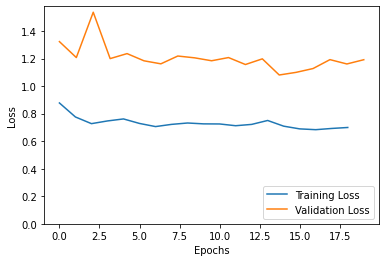

In [37]:
plot_stats(history.history['loss'], history.history['val_loss'], x_label='Epochs', stats='loss')

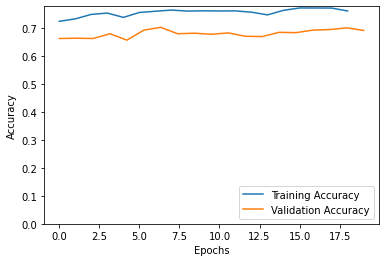

In [38]:
plot_stats(history.history['accuracy'], history.history['val_accuracy'], x_label='Epochs', stats='accuracy')

In [39]:
reloaded_model = tf.keras.models.load_model('/content/model.h5')
reloaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               327936    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

# CNN and Image Augmentation

In [49]:
def check_image(path_list):
    """ Check if image is readable
    """
    
    for index, image_path in enumerate(path_list):
        try:
            image = tf.io.read_file(image_path)
            image = tf.image.decode_jpeg(image, channels=3)
        except:
            print(all_image_paths[index])

In [66]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Building image generator for image augmentation with flow_from_directory

TRAINING_DIR = "/project/data/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/project/data/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical'
)


Found 9013 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


In [67]:
model = tf.keras.models.Sequential([
    # 1st convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  4th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # Adding Dropout to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)      

In [68]:
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, verbose = 1, validation_data=validation_generator, callbacks=[checkpoint_cb])

Epoch 1/50
282/282 [==============================] - ETA: 0s - loss: 1.0495 - accuracy: 0.6676
Epoch 00001: val_loss improved from 1.04576 to 0.97514, saving model to mymodel_1.h5
282/282 [==============================] - 182s 644ms/step - loss: 1.0495 - accuracy: 0.6676 - val_loss: 0.9751 - val_accuracy: 0.6627
Epoch 2/50
282/282 [==============================] - ETA: 0s - loss: 0.9839 - accuracy: 0.6683
Epoch 00002: val_loss improved from 0.97514 to 0.95426, saving model to mymodel_2.h5
282/282 [==============================] - 177s 629ms/step - loss: 0.9839 - accuracy: 0.6683 - val_loss: 0.9543 - val_accuracy: 0.6627
Epoch 3/50
282/282 [==============================] - ETA: 0s - loss: 0.9571 - accuracy: 0.6709
Epoch 00003: val_loss improved from 0.95426 to 0.90362, saving model to mymodel_3.h5
282/282 [==============================] - 183s 648ms/step - loss: 0.9571 - accuracy: 0.6709 - val_loss: 0.9036 - val_accuracy: 0.6647
Epoch 4/50
282/282 [==============================] 

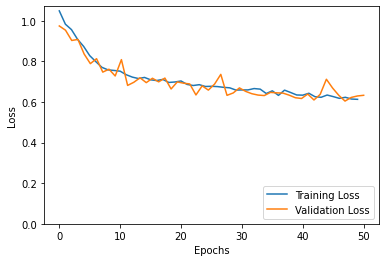

In [69]:
plot_stats(history.history['loss'], history.history['val_loss'], x_label='Epochs', stats='loss')

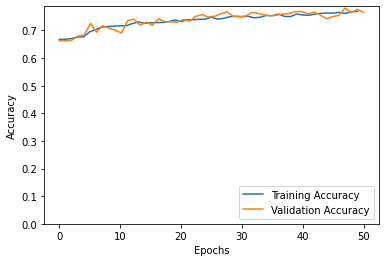

In [70]:
plot_stats(history.history['accuracy'], history.history['val_accuracy'], x_label='Epochs', stats='accuracy')

In [71]:
model.save('cnn_model.h5')

# Undersampling and Oversampling for training

In [73]:
# Creating a new DataFrame
# Train set
train_tup = list(zip(all_train_paths, all_train_labels))
new_train_df = pd.DataFrame(train_tup, columns=['filename', 'class'])
# Test set
test_tup = list(zip(all_test_paths, all_test_labels))
new_test_df = pd.DataFrame(test_tup, columns=['filename', 'class'])

In [74]:
# Select specific type of disease
bkl_train = new_train_df[new_train_df['label']==0]
nv_train = new_train_df[new_train_df['label']==1]
df_train = new_train_df[new_train_df['label']==2]
mel_train = new_train_df[new_train_df['label']==3]
vasc_train = new_train_df[new_train_df['label']==4]
bcc_train = new_train_df[new_train_df['label']==5]
akiec_train = new_train_df[new_train_df['label']==6]

# Number of each type of disease
print(bkl_train.shape[0]) 
print(nv_train.shape[0])
print(df_train.shape[0])
print(mel_train.shape[0])
print(vasc_train.shape[0])
print(bcc_train.shape[0])
print(akiec_train.shape[0])

976
6041
102
997
131
466
300


In [91]:
mel_train.sample()

path  label
619  /project/data/train/mel/ISIC_0032812.jpg      3

In [92]:
# Target resampling size
target_resample_size = int(np.round(len(all_train_paths)/7, 0))

#Oversampling
df_over = df_train.sample(replace=True, n=target_resample_size)
vasc_over = vasc_train.sample(replace=True, n=target_resample_size)
akiec_over = akiec_train.sample(replace=True, n=target_resample_size)
bcc_over = bcc_train.sample(replace=True, n=target_resample_size)
bkl_over = bkl_train.sample(replace=True, n=target_resample_size)
mel_over = mel_train.sample(replace=True, n=target_resample_size)

#Undersampling
nv_under = nv_train.sample(target_resample_size)

#Concat oversampling and undersampling sample together
new_balance_data = pd.concat([df_over, vasc_over, akiec_over, bcc_over, bkl_over, mel_over, nv_under])

In [ ]:
index_to_label = {
    0: 'bkl',
    1: 'nv',
    2: 'df',
    3: 'mel',
    4: 'vasc',  
    5: 'bcc',
    6: 'akiec'
}

In [134]:
# Convert from index to label
new_balance_data['class'].replace(index_to_label, inplace=True)
new_test_df['class'].replace(index_to_label, inplace=True)
new_test_df.sample(10)

filename class
507    /project/data/test/nv/ISIC_0028038.jpg    nv
928    /project/data/test/nv/ISIC_0025657.jpg    nv
197   /project/data/test/bcc/ISIC_0032316.jpg   bcc
4    /project/data/test/vasc/ISIC_0029448.jpg  vasc
76    /project/data/test/mel/ISIC_0025963.jpg   mel
0    /project/data/test/vasc/ISIC_0027385.jpg  vasc
119   /project/data/test/mel/ISIC_0030391.jpg   mel
693    /project/data/test/nv/ISIC_0033983.jpg    nv
897    /project/data/test/nv/ISIC_0033398.jpg    nv
871    /project/data/test/nv/ISIC_0028932.jpg    nv

In [131]:
# Image augmentation with flow_from_dataframe
balanced_train_generator = training_datagen.flow_from_dataframe(
	new_balance_data,
	target_size=(224,224),
	class_mode='categorical')

Found 9016 validated image filenames belonging to 7 classes.


In [135]:
balanced_validation_generator = validation_datagen.flow_from_dataframe(
	new_test_df,
	target_size=(224,224),
	class_mode='categorical')

Found 1002 validated image filenames belonging to 7 classes.


In [136]:
# Reload and continue training model
reloaded_model = tf.keras.models.load_model('/content/cnn_model.h5')
reloaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)      

In [137]:
reloaded_model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

reloaded_history = reloaded_model.fit(balanced_train_generator, 
                                      epochs=20, 
                                      verbose = 1, 
                                      validation_data=balanced_validation_generator, 
                                      callbacks=[checkpoint_cb])

Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 0.9067 - accuracy: 0.6422
Epoch 00001: val_loss did not improve from 0.60487
282/282 [==============================] - 185s 656ms/step - loss: 0.9067 - accuracy: 0.6422 - val_loss: 0.9547 - val_accuracy: 0.6198
Epoch 2/20
282/282 [==============================] - ETA: 0s - loss: 0.8671 - accuracy: 0.6589
Epoch 00002: val_loss did not improve from 0.60487
282/282 [==============================] - 185s 656ms/step - loss: 0.8671 - accuracy: 0.6589 - val_loss: 0.9245 - val_accuracy: 0.6287
Epoch 3/20
282/282 [==============================] - ETA: 0s - loss: 0.8209 - accuracy: 0.6869
Epoch 00003: val_loss did not improve from 0.60487
282/282 [==============================] - 185s 658ms/step - loss: 0.8209 - accuracy: 0.6869 - val_loss: 1.0143 - val_accuracy: 0.6168
Epoch 4/20
282/282 [==============================] - ETA: 0s - loss: 0.8035 - accuracy: 0.6861
Epoch 00004: val_loss did not improve from 0.60487
282/282